In [1]:
"""
DBSCAN算法将数据点分为三类：
• 核心点：在半径Eps内含有超过MinPts数目的点
• 边界点：在半径Eps内点的数量小于MinPts，但是落在核心点的邻域内
• 噪音点：既不是核心点也不是边界点的点

"""

'\nDBSCAN算法将数据点分为三类：\n• 核心点：在半径Eps内含有超过MinPts数目的点\n• 边界点：在半径Eps内点的数量小于MinPts，但是落在核心点的邻域内\n• 噪音点：既不是核心点也不是边界点的点\n\n'

Labels:
[ 0 -1  0  1 -1  1  0  1  2 -1  1  0  1  1  3 -1 -1  3 -1  1  1 -1  1  3
  4 -1  1  1  2  0  2  2 -1  0  1  0  0  0  1  3 -1  0  1  1  0  0  2 -1
  1  3  1 -1  3 -1  3  0  1  1  2  3  3 -1 -1 -1  0  1  2  1 -1  3  1  1
  2  3  0  1 -1  2  0  0  3  2  0  1 -1  1  3 -1  4  2 -1 -1  0 -1  3 -1
  0  2  1 -1 -1  2  1  1  2  0  2  1  1  3  3  0  1  2  0  1  0 -1  1  1
  3 -1  2  1  3  1  1  1  2 -1  5 -1  1  3 -1  0  1  0  0  1 -1 -1 -1  2
  2  0  1  1  3  0  0  0  1  4  4 -1 -1 -1 -1  4 -1  4  4 -1  4 -1  1  2
  2  3  0  1  0 -1  1  0  0  1 -1 -1  0  2  1  0  2 -1  1  1 -1 -1  0  1
  1 -1  3  1  1 -1  1  1  0  0 -1  0 -1  0  0  2 -1  1 -1  1  0 -1  2  1
  3  1  1 -1  1  0  0 -1  0  0  3  2  0  0  5 -1  3  2 -1  5  4  4  4 -1
  5  5 -1  4  0  4  4  4  5  4  4  5  5  0  5  4 -1  4  5  5  5  1  5  5
  0  5  4  4 -1  4  4  5  4  0  5  4 -1  0  5  5  5 -1  4  5  5  5  5  4
  4]
Noise raito: 22.15%
Estimated number of clusters: 6
Silhouette Coefficient: 0.710
Cluster  0 :
[22, 22, 22, 22,

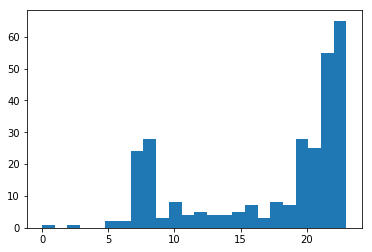

In [4]:
import numpy as np
import sklearn.cluster as skc
from sklearn import metrics
import matplotlib.pyplot as plt

mac2id = dict()
onlinetimes = []
f = open('StudentMonthlyOnlineTimeDistribution..txt', encoding='utf-8')
for line in f:
    mac = line.split(',')[2]
    onlinetime = int(line.split(',')[6])
    starttime = int(line.split(',')[4].split(' ')[1].split(':')[0])
    if mac not in mac2id:
        mac2id[mac] = len(onlinetimes)
        onlinetimes.append((starttime, onlinetime))
    else:
        onlinetimes[mac2id[mac]] = [(starttime, onlinetime)]
real_X = np.array(onlinetimes).reshape((-1, 2))

X = real_X[:, 0:1]

db = skc.DBSCAN(eps=0.01, min_samples=20).fit(X)
labels = db.labels_         # 调 用 DBSCAN 方 法 进 行 训 练 ，labels为每个数据的簇标签

print('Labels:')
print(labels)
raito = len(labels[labels[:] == -1]) / len(labels)
print('Noise raito:', format(raito, '.2%'))         # 打印数据被记上的标签，计算标签为-1，即噪声数据的比例

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))  # 计算簇的个数并打印，评价聚类效果

for i in range(n_clusters_):
    print('Cluster ', i, ':')
    print(list(X[labels == i].flatten()))   # 打印各簇标号以及各簇内数据

print(plt.hist(X, 24))  # 画出直方图观察结

In [ ]:
"""
DBSCAN密度聚类
DBSCAN主要参数：
eps: 两个样本被看作邻居节点的最大距离
min_samples: 簇的样本数
metric：距离计算方式

DBSCAN算法流程：
1.将所有点标记为核心点、边界点或噪声点；
2.删除噪声点；
3.为距离在Eps之内的所有核心点之间赋予一条边；
4.每组连通的核心点形成一个簇；
5.将每个边界点指派到一个与之关联的核心点的簇中（哪一个核心点的半
径范围之内）

"""